Data Preprocessing


In [23]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
#Loading data
data = pd.read_csv("C:/Users/User/Documents/DATA ANALYST/Info Tech Projects/Task 3 ML/Term deposit Prediction/bank_data.csv", delimiter=';')

In [25]:
#Inspecting the data
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Handling Missing Values

In [26]:
#Check missing values
print(data.isnull().sum())
data.replace('unknown', pd.NA, inplace= True)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [27]:
#Encoding Categorical Variables
data_encoded = pd.get_dummies(data, drop_first= True)


In [28]:
#Scaling numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])

Exploratory Data Analysis

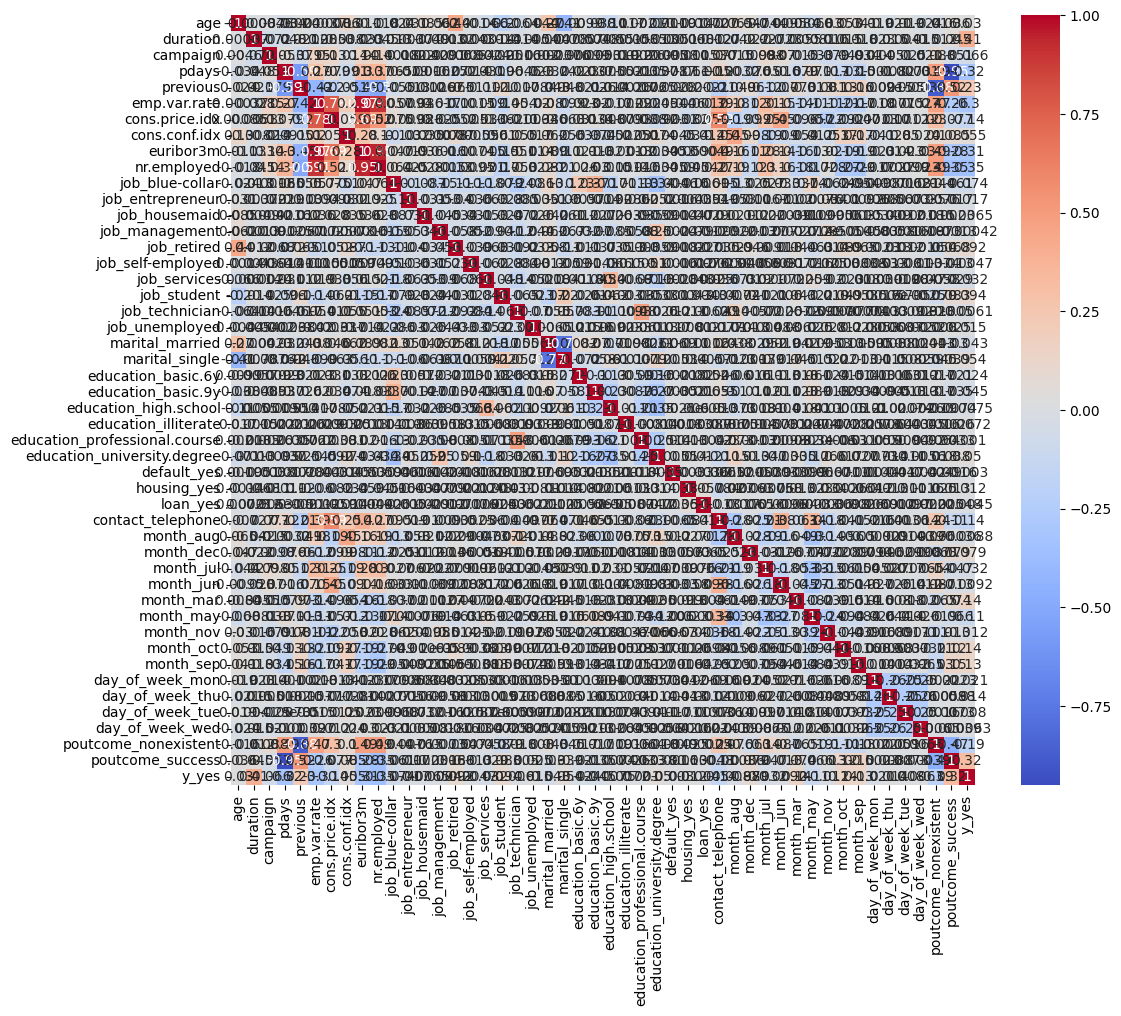

In [29]:
#Correlation Analysis
correlation_matrix = data_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [30]:
#Splitting the data
from sklearn.model_selection import train_test_split
X = data_encoded.drop('y_yes', axis=1)
y = data_encoded['y_yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
# Initialize and train the model
model = LogisticRegression( max_iter= 1000)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10678   290]
 [  806   583]]
              precision    recall  f1-score   support

       False       0.93      0.97      0.95     10968
        True       0.67      0.42      0.52      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.70      0.73     12357
weighted avg       0.90      0.91      0.90     12357



The model performs well at predicting 'no' subscriptions but struggles with predicting 'yes' subscriptions.

The accuracy of 91% indicates that the model is generally good at predicting both classes, but the class imbalance affects its performance on the positive class.

Hyperparameter Tuning

In [37]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1, 'solver': 'liblinear'}
0.910998636434253


Model Evaluation

ROC AUC: 0.6966429337731757


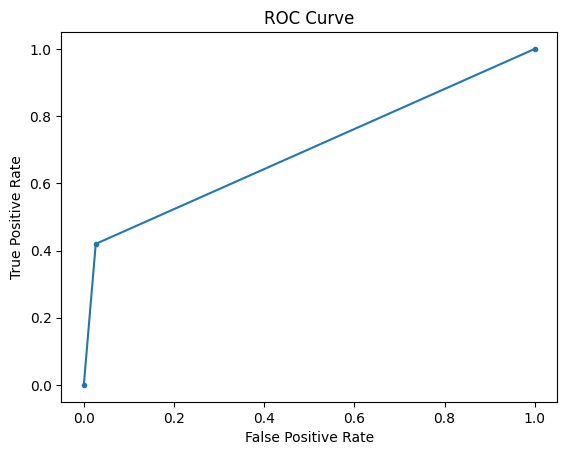

In [38]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC: {roc_auc}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Feature Importance

In [39]:
#Identifying important features in predicting target variable
importances = model.coef_[0]
features = X_train.columns
importance_data = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_data = importance_data.sort_values(by='Importance', ascending=False)
print(importance_data)

                          Feature  Importance
36                      month_mar    1.843484
1                        duration    1.187745
6                  cons.price.idx    1.137364
8                       euribor3m    0.749980
32                      month_aug    0.714444
46               poutcome_success    0.702440
45           poutcome_nonexistent    0.423169
25           education_illiterate    0.389262
27    education_university.degree    0.216865
40                      month_sep    0.201198
44                day_of_week_wed    0.200865
9                     nr.employed    0.186204
14                    job_retired    0.183085
43                day_of_week_tue    0.145835
17                    job_student    0.136564
22             education_basic.6y    0.134321
42                day_of_week_thu    0.132696
39                      month_oct    0.131929
33                      month_dec    0.092934
34                      month_jul    0.079173
7                   cons.conf.idx 

Report and Conclusion

*Hyperparameters*

C: 1: This is the regularization parameter for the logistic regression model. A value of 1 suggests a moderate amount of regularization, which helps to avoid overfitting by penalizing large coefficients. 

*Convergence*

Switching to the liblinear solver from lbfgs helped resolve the convergence issues, as liblinear is often more robust for datasets with fewer samples or high-dimensional features.

*Accuracy*

The accuracy score of approximately 0.911 (or 91.1%) indicates that the model correctly predicted the outcome in about 91.1% of the cases. This is a strong performance metric, showing that the model is effective at distinguishing between the classes. The accuracy is quite high, suggesting that the model performs well in predicting the target variable.

*Evaluation*
The ROC AUC score of 0.697 indicates that your model has a reasonable ability to differentiate between the positive and negative classes

